# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary

In [148]:
# import libraries here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`

In [ ]:
# your answer here
employee = pd.read_csv('Employee.csv', index_col=False)
employee.head()

In [122]:
employee['id'] = employee.index # lo usarmos más adelante
employee

,Name,Department,Education,Gender,Title,Years,Salary,id
0,Jose,IT,Bachelor,M,analyst,1,35,0
1,Maria,IT,Master,F,analyst,2,30,1
2,David,HR,Master,M,analyst,2,30,2
3,Sonia,HR,Bachelor,F,analyst,4,35,3
4,Samuel,Sales,Master,M,associate,3,55,4
5,Eva,Sales,Bachelor,F,associate,2,55,5
6,Carlos,IT,Master,M,VP,8,70,6
7,Pedro,IT,Phd,M,associate,7,60,7
8,Ana,HR,Master,F,VP,8,70,8


#### What's the mean salary by department. 
##### Tip : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [123]:
# your answer here-1st way
employee.groupby('Department').agg({'Salary': 'mean'})

,Salary
Department,
HR,45.00
IT,48.75
Sales,55.00


In [124]:
# your answer here-2nd way
employee.pivot_table(index=["Department"]).loc[:, 'Salary']

Department
HR       45.00
IT       48.75
Sales    55.00
Name: Salary, dtype: float64

#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title

In [125]:
# your answer here

employee.pivot_table(index=["Department", 'Title'], aggfunc=np.mean).loc[:, 'Salary']


Department  Title    
HR          VP           70.0
            analyst      32.5
IT          VP           70.0
            analyst      32.5
            associate    60.0
Sales       associate    55.0
Name: Salary, dtype: float64

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [126]:
# your answer here
employee.pivot_table(index=['Years'], aggfunc=np.mean)

,Salary,id
Years,,
1,35.000000,0.000000
2,38.333333,2.666667
3,55.000000,4.000000
4,35.000000,3.000000
7,60.000000,7.000000
8,70.000000,7.000000


#### We want to know the information about the mean salary and number of employees in each department and for each job title

In [128]:
# your answer here , values=[Salary']

employee.pivot_table(index=['Department', 'Title'], 
                     values=['Salary', 'id'], 
                     aggfunc={'Salary': 'mean', 'id': 'count'})

# 'Name debería ser employee index

Salary  id
Department Title                
HR         VP           70.0   1
           analyst      32.5   2
IT         VP           70.0   1
           analyst      32.5   2
           associate    60.0   1
Sales      associate    55.0   2

#### We want to know for each department and for each job title the Salary's median,minimum,maximum and standard deviation. Comment your results

In [129]:
# your answer here
df_e = employee.pivot_table(index=['Department', 'Title'] , 
                            aggfunc=[np.mean, np.min, np.max, np.std], 
                            values=["Salary"])
df_e

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
IT         VP          70.0     70     70       NaN
           analyst     32.5     30     35  3.535534
           associate   60.0     60     60       NaN
Sales      associate   55.0     55     55  0.000000

#### Based on your comments, fill the missing values with an appropriate value

In [130]:
# your answer here

# NaN ocurre cuando solo hay un elemento ya que no tiene sentido calcular std. 
# Vamos a igualarlo a 0.0

df_e[df_e['std', 'Salary'].isnull()] = 0.0
df_e

mean   amin   amax       std
                     Salary Salary Salary    Salary
Department Title                                   
HR         VP           0.0    0.0    0.0  0.000000
           analyst     32.5   30.0   35.0  3.535534
IT         VP           0.0    0.0    0.0  0.000000
           analyst     32.5   30.0   35.0  3.535534
           associate    0.0    0.0    0.0  0.000000
Sales      associate   55.0   55.0   55.0  0.000000

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [131]:
# your answer here

employee.pivot_table(index=['Department'], 
                     values=['Salary', 'id'], 
                     aggfunc={'Salary': 'sum', 'id': 'count'})

,Salary,id
Department,,
HR,135,3
IT,195,4
Sales,110,2


#### For each Department and Title, we want to know the the total years of work experience and the mean salary

In [138]:
# your answer here

employee.pivot_table(index=['Department', 'Title'], 
                    values=['Years', 'Salary'], 
                    aggfunc={'Years': 'sum', 'Salary': 'mean'}) # , columns=['Years', 'Salary'])

Salary  Years
Department Title                   
HR         VP           70.0      8
           analyst      32.5      6
IT         VP           70.0      8
           analyst      32.5      3
           associate    60.0      7
Sales      associate    55.0      5

#### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table

#### * Hint: Write a custom function*

In [163]:
# your answer here--Your custom function here
        
dept_maxs = employee.pivot_table(index=['Department'], 
                                values=['Salary'], 
                                aggfunc={'Salary': 'max'})

In [164]:
def remove_max(x): 
    pass

In [165]:
# your answer here


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`

In [166]:
# your answer here

fitbit = pd.read_csv('Fitbit.csv')

In [167]:
fitbit.head()

,Date,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
0,08-05-2015,1934,905,0.65,0,1.355,46,0,0,1680,384,26,23,417
1,09-05-2015,3631,18925,14.11,4,611.000,316,61,60,2248,454,35,21,491
2,10-05-2015,3204,14228,10.57,1,602.000,226,14,77,1719,387,46,25,436
3,11-05-2015,2673,6756,5.02,8,749.000,190,23,4,9620,311,31,21,350
4,12-05-2015,2495,502,3.73,1,876.000,171,0,0,7360,407,65,44,491


#### Explore you dataset in terms of data types and descriptive statistics
#### *Hint: Use Pandas functions from previous lectures*

In [168]:
# your answer here
fitbit.dtypes

Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [169]:
# your answer here
fitbit.describe()

,Calorie burned,Steps,Distance,Floors,Minutes Sedentary,Minutes Lightly Active,Minutes Fairly Active,Minutes Very Active,Activity Calories,MinutesOfSleep,MinutesOfBeingAwake,NumberOfAwakings,LengthOfRestInMinutes
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,2741.501362,10121.588556,8.549128,11.724796,563.934482,236.405995,26.163488,35.722071,2044.147139,290.479564,28.008174,16.196185,321.343324
std,916.307036,5594.836225,3.409881,10.337370,294.793145,86.531376,20.319456,31.006682,2041.267168,154.752328,18.541415,10.757622,170.786726
min,179.000000,0.000000,0.000000,0.000000,1.002000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2698.000000,6730.500000,6.155000,5.000000,520.000000,179.000000,8.000000,10.500000,1218.500000,224.000000,14.000000,7.000000,248.000000
50%,2974.000000,10413.000000,8.290000,11.000000,663.000000,226.000000,24.000000,29.000000,1553.000000,337.000000,29.000000,16.000000,370.000000
75%,3233.000000,13916.500000,10.560000,16.000000,756.500000,290.000000,41.500000,54.000000,1927.500000,400.500000,41.500000,24.000000,440.500000
max,4351.000000,26444.000000,20.450000,101.000000,998.000000,472.000000,101.000000,153.000000,9830.000000,553.000000,78.000000,45.000000,607.000000


#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [173]:
# your answer here
correlations =  {'pearson', 'kendall', 'spearman'}
for c in correlations: 
    print(c, fitbit['Minutes Very Active'].corr(fitbit['Steps'], method=c))

spearman 0.6321453084956241
pearson 0.5714518481062608
kendall 0.47562095104419594


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

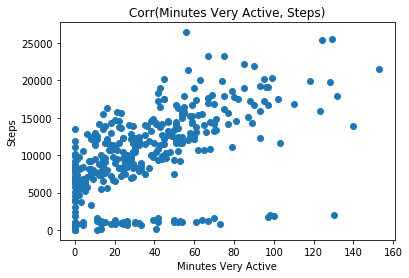

In [174]:
# your answer here
fig, ax = plt.subplots()

ax.scatter(x=fitbit['Minutes Very Active'], y=fitbit['Steps'])
plt.xlabel('Minutes Very Active')
plt.ylabel('Steps')
plt.title('Corr(Minutes Very Active, Steps)')
plt.show()

#### What can you say about Minute Very Active and Steps? Write a comment below

In [19]:
# your comment here

# Parece haber una correlación salvo para alguno casos que 
# aunque está minutos activo, no parece dar pasos. 

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [176]:
# your answer here
correlations =  {'pearson', 'kendall', 'spearman'}
for c in correlations: 
    print(c, fitbit['Minutes Sedentary'].corr(fitbit['Steps'], method=c))


spearman -0.12199693227604608
pearson 0.07690608062990091
kendall -0.09306452171163578


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

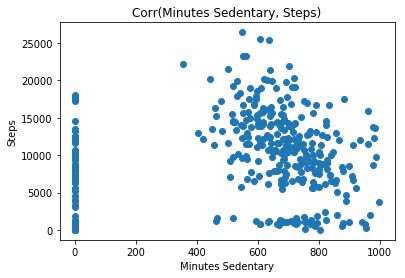

In [177]:
# your answer here

fig, ax = plt.subplots()

ax.scatter(x=fitbit['Minutes Sedentary'], y=fitbit['Steps'])
plt.xlabel('Minutes Sedentary')
plt.ylabel('Steps')
plt.title('Corr(Minutes Sedentary, Steps)')
plt.show()

In [22]:
# Your comment here

# Estas variables no están correlacionadas linealmente

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [178]:
# your answer here
correlations =  {'pearson', 'kendall', 'spearman'}
for c in correlations: 
    print(c, fitbit['MinutesOfSleep'].corr(fitbit['Steps'], method=c))

spearman 0.09310892758263727
pearson 0.1309856595083638
kendall 0.06410601068869443


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

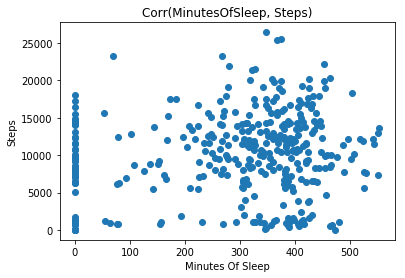

In [179]:
# your answer here
fig, ax = plt.subplots()

ax.scatter(x=fitbit['MinutesOfSleep'], y=fitbit['Steps'])
plt.xlabel('Minutes Of Sleep')
plt.ylabel('Steps')
plt.title('Corr(MinutesOfSleep, Steps)')
plt.show()

# No están correlacionadas

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [182]:
# your answer here

column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

cor_fit = fitbit[column].corr()


In [184]:
#Print cor_fit
display(cor_fit)

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [186]:
# your answer here
cor_fit['Steps'].sort_values(ascending=False)

Steps                  1.000000
Minutes Very Active    0.571452
Floors                 0.306511
Calorie burned         0.255305
MinutesOfSleep         0.130986
Minutes Sedentary      0.076906
Name: Steps, dtype: float64

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`

In [28]:
# your answer here

In [29]:
#Print time_grades

#### Show visually the frequency distribution of the time_grades dataset.

In [30]:
# your answer here

#### Is there a correaltion between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [31]:
# your answer here-Pearson 

In [32]:
## your answer here-Spearman

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

In [33]:
# your answer here

In [34]:
#your comment here

#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [35]:
#your comment here